# Customer Segmentation Using K-means Algorithm

I will use k-means algorithm to discover target customers who can be eailsy converge. 

Data Source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python


## Data

This dataset contains the following features:

* 'CustomerID' : Unique ID assigned to the customer
* 'Gender' : Gender of the customer
* 'Age' : Age of the customer
* 'Annual Income' : Annual Income of the customee
* 'Spending Score' : Score assigned by the mall based on customer behavior and spending nature

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# checking null values

display(df.isnull().any())

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

## EDA

Let's create some visualizations before running k-means clustering.

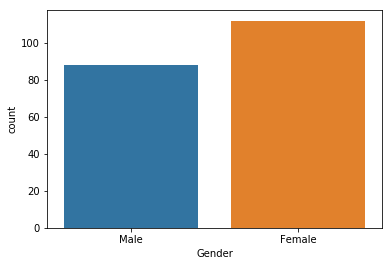

In [7]:
sns.countplot(x='Gender', data=df)

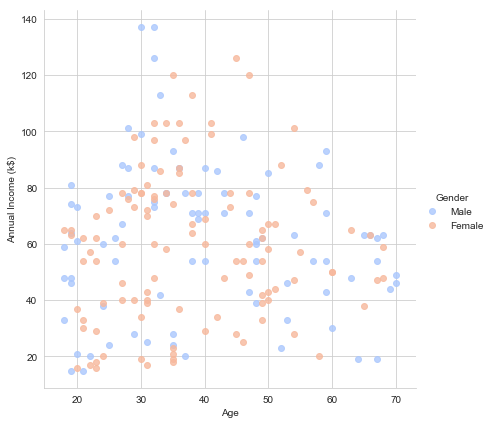

In [8]:
import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')
sns.lmplot('Age','Annual Income (k$)',data=df, hue='Gender',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

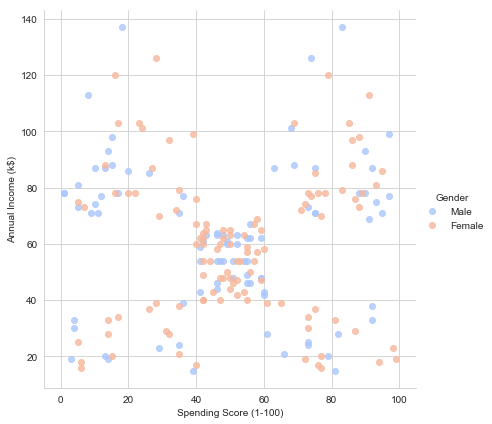

In [9]:
sns.set_style('whitegrid')
sns.lmplot('Spending Score (1-100)','Annual Income (k$)',data=df, hue='Gender',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

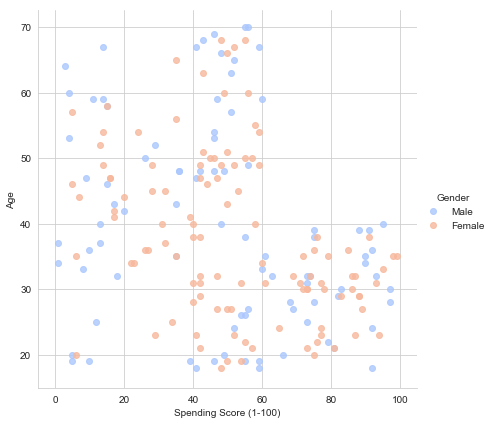

In [10]:
sns.set_style('whitegrid')
sns.lmplot('Spending Score (1-100)','Age',data=df, hue='Gender',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

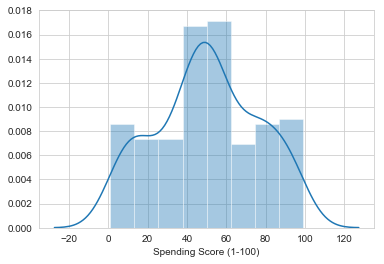

In [11]:
sns.distplot(df['Spending Score (1-100)'])

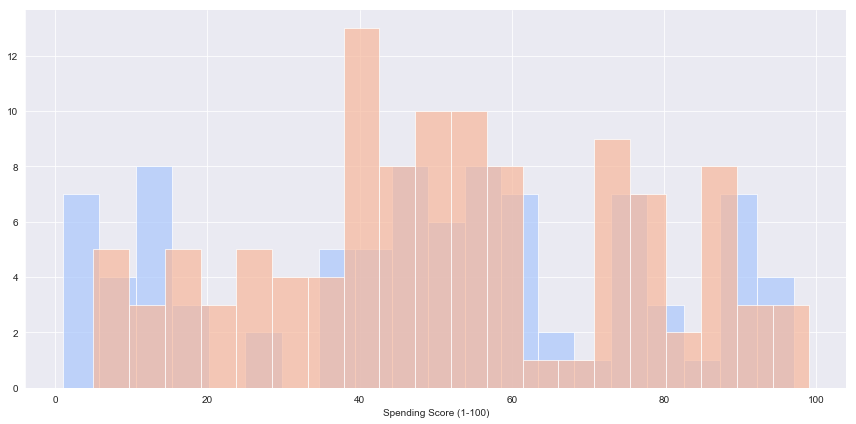

In [12]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Gender",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Spending Score (1-100)',bins=20,alpha=0.7)

## K-means Clustering Algorithm

In [13]:
# transforming Gender varaible to dummy

df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
# need to find optimal value of k

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df.drop('CustomerID',axis=1))
    wcss.append(kmeans.inertia_)

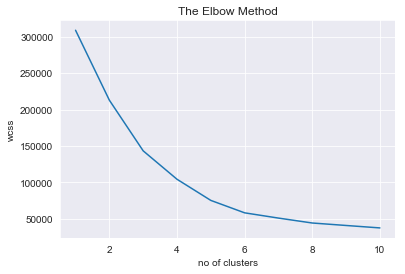

In [16]:
# visualizing the ELBOW method to get the optimal value of K 

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [18]:
y_kmeans= kmeans.fit_predict(df.drop('CustomerID',axis=1))

In [19]:
kmeans.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

In [20]:
kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

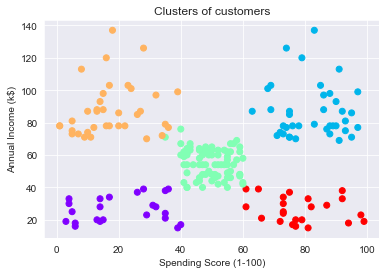

In [21]:
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'],c=kmeans.labels_,cmap='rainbow')
plt.title('Clusters of customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

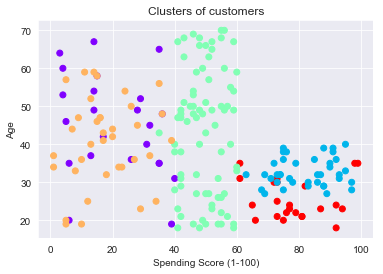

In [22]:
plt.scatter(df['Spending Score (1-100)'],df['Age'],c=kmeans.labels_,cmap='rainbow')
plt.title('Clusters of customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()

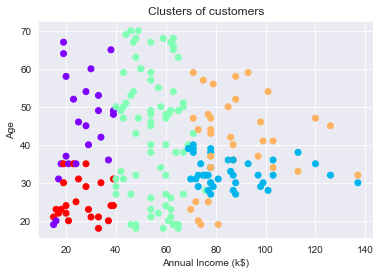

In [23]:
plt.scatter(df['Annual Income (k$)'],df['Age'],c=kmeans.labels_,cmap='rainbow')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

In [24]:
cluster = pd.DataFrame(y_kmeans)

In [25]:
final = pd.concat([df,cluster], axis=1)
final.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


In [26]:
final.groupby(0).mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,,,,,
0,23.000000,0.391304,45.217391,26.304348,20.913043
1,162.000000,0.461538,32.692308,86.538462,82.128205
2,86.265823,0.417722,43.088608,55.291139,49.569620
3,163.500000,0.527778,40.666667,87.750000,17.583333
4,24.000000,0.391304,25.521739,26.304348,78.565217


*group 0 = low income, less likely spend money

*group 1 = high income, most likely spend money

*group 2 = mid income, average likely spend money

*group 3 = high income, less likely spend money

*group 4 = young adults, low income, more likely spend money

I'd mainly target group 2 and group 4 because they are likely spend more than other groups.